In [1]:
import tensorflow as tf
import keras
from keras.optimizers import SGD, RMSprop, Adam, Lion
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

In [4]:
id2class = {
    idx: name for idx, name in enumerate([
        'airplane', 'automobile', 'bird',
        'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'
    ])
}

In [5]:
DIM_PER_LAYER = [1152, 576, 288]
EPOCHS = 50

In [6]:
def construct_model(input_shape: tuple[int,...], dim_per_layer: list[int], n_classes: int) -> tf.keras.Model:
    input_x = tf.keras.layers.Input(shape=input_shape)


    x = tf.keras.layers.Flatten()(input_x)
    for dim in dim_per_layer:
        x = tf.keras.layers.Dense(dim, activation='relu')(x)

    out_x = tf.keras.layers.Dense(n_classes)(x) # можна додати activation = 'softmax'


    return tf.keras.Model(inputs=input_x, outputs=out_x)

In [7]:
def train_model(optimizer:tf.keras.optimizers, batch_size:int) -> keras.src.callbacks.History:
    model = construct_model((32,32,3), dim_per_layer=DIM_PER_LAYER, n_classes=len(id2class))

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    hist = model.fit(
        x=x_train,
        y=y_train,
        epochs=EPOCHS,
        batch_size=batch_size,
        validation_data=(x_test, y_test)
    )
    return hist

In [22]:
def plot_training_history(train_histories):
    plt.figure(figsize=(15, 10))
    metrics = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
    titles = ['Train values - loss', 'Val(test) values - loss', 
              'Train values - accuracy', 'Val(test) values - accuracy']
    y_labels = ['loss', 'loss', 'accuracy', 'accuracy']

    for i, (metric, title, y_label) in enumerate(zip(metrics, titles, y_labels), start=1):
        plt.subplot(2, 2, i)
        for optimizer, history in train_histories.items():
            plt.plot(history[metric], label=optimizer)
        plt.title(title)
        plt.xlabel('epoch')
        plt.ylabel(y_label)
        if i == 4: 
            plt.legend()
    plt.show()

### Stochastic Gradient Descent (SDG)

#### SDG - batch 32 

In [27]:
hist_SGD_batch32 = train_model(SGD(learning_rate=1e-2, momentum=0), batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 76s 48ms/step - loss: 1.8301 - accuracy: 0.3476 - val_loss: 1.7027 - val_accuracy: 0.3893
Epoch 2/50
1563/1563 [==============================] - 76s 49ms/step - loss: 1.6397 - accuracy: 0.4173 - val_loss: 1.6005 - val_accuracy: 0.4327
Epoch 3/50
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5589 - accuracy: 0.4452 - val_loss: 1.5471 - val_accuracy: 0.4444
Epoch 4/50
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4976 - accuracy: 0.4671 - val_loss: 1.4755 - val_accuracy: 0.4743
Epoch 5/50
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4488 - accuracy: 0.4855 - val_loss: 1.4507 - val_accuracy: 0.4771
Epoch 6/50
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4041 - accuracy: 0.5019 - val_loss: 1.4708 - val_accuracy: 0.4752
Epoch 7/50
1563/1563 [==============================] - 99s 64ms/step - loss: 1.3665 - accuracy: 0.5146 - val_loss: 1.4224 -

#### SDG - batch 128

In [28]:
hist_SGD_batch128 = train_model(SGD(learning_rate=1e-2, momentum=0), batch_size=128)

Epoch 1/50
391/391 [==============================] - 32s 80ms/step - loss: 1.9505 - accuracy: 0.3125 - val_loss: 1.8448 - val_accuracy: 0.3456
Epoch 2/50
391/391 [==============================] - 33s 85ms/step - loss: 1.7796 - accuracy: 0.3716 - val_loss: 1.7199 - val_accuracy: 0.3985
Epoch 3/50
391/391 [==============================] - 34s 87ms/step - loss: 1.7045 - accuracy: 0.4000 - val_loss: 1.6915 - val_accuracy: 0.4063
Epoch 4/50
391/391 [==============================] - 34s 88ms/step - loss: 1.6506 - accuracy: 0.4195 - val_loss: 1.6253 - val_accuracy: 0.4315
Epoch 5/50
391/391 [==============================] - 34s 87ms/step - loss: 1.6097 - accuracy: 0.4347 - val_loss: 1.5864 - val_accuracy: 0.4392
Epoch 6/50
391/391 [==============================] - 34s 87ms/step - loss: 1.5735 - accuracy: 0.4475 - val_loss: 1.5854 - val_accuracy: 0.4394
Epoch 7/50
391/391 [==============================] - 34s 87ms/step - loss: 1.5437 - accuracy: 0.4567 - val_loss: 1.5708 - val_accuracy:

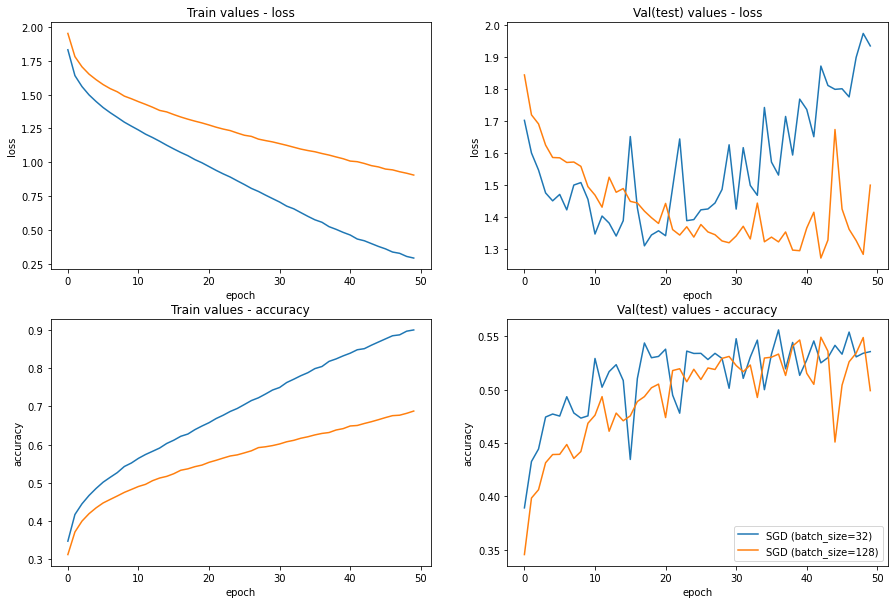

In [29]:
plot_training_history(train_histories= {
    'SGD (batch_size=32)': hist_SGD_batch32.history,
    'SGD (batch_size=128)': hist_SGD_batch128.history
})

1. Модель із *розміром партії 32* показала **кращу точність** на тестовій вибірці
2. **Перенавчання**: на тренувальній вибірці покращуються показники функції втрат та точності, в то й час як на тестовій вибірці є нестабільними (особливо показники функції втрат для моделі із розміром партії 32, які свідчать про перенавчання)
3. **Точність**: зберігається тенденція моделей на покращення здатності узагальнення

### Stochastic Gradient Descent with momentum (SDG with momentum)

#### SDG with momentum - batch 32

In [10]:
hist_SGD_momentum_batch32 = train_model(SGD(learning_rate=1e-3, momentum=0.9), batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8277 - accuracy: 0.3473 - val_loss: 1.7290 - val_accuracy: 0.3712
Epoch 2/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6334 - accuracy: 0.4220 - val_loss: 1.6625 - val_accuracy: 0.4059
Epoch 3/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5484 - accuracy: 0.4527 - val_loss: 1.5397 - val_accuracy: 0.4441
Epoch 4/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4846 - accuracy: 0.4736 - val_loss: 1.5322 - val_accuracy: 0.4593
Epoch 5/50
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4360 - accuracy: 0.4906 - val_loss: 1.4854 - val_accuracy: 0.4758
Epoch 6/50
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3887 - accuracy: 0.5071 - val_loss: 1.4376 - val_accuracy: 0.4862
Epoch 7/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3522 - accuracy: 0.5205 - val_loss: 1.4227 -

#### SDG with momentum - batch 128

In [11]:
hist_SGD_momentum_batch128 = train_model(SGD(learning_rate=1e-3, momentum=0.9), batch_size=128)

Epoch 1/50
391/391 [==============================] - 15s 37ms/step - loss: 1.9711 - accuracy: 0.3027 - val_loss: 1.8210 - val_accuracy: 0.3549
Epoch 2/50
391/391 [==============================] - 15s 38ms/step - loss: 1.7676 - accuracy: 0.3810 - val_loss: 1.7109 - val_accuracy: 0.4047
Epoch 3/50
391/391 [==============================] - 15s 38ms/step - loss: 1.6903 - accuracy: 0.4075 - val_loss: 1.6549 - val_accuracy: 0.4202
Epoch 4/50
391/391 [==============================] - 15s 37ms/step - loss: 1.6323 - accuracy: 0.4265 - val_loss: 1.6031 - val_accuracy: 0.4366
Epoch 5/50
391/391 [==============================] - 16s 41ms/step - loss: 1.5874 - accuracy: 0.4455 - val_loss: 1.5712 - val_accuracy: 0.4494
Epoch 6/50
391/391 [==============================] - 15s 38ms/step - loss: 1.5501 - accuracy: 0.4584 - val_loss: 1.5473 - val_accuracy: 0.4528
Epoch 7/50
391/391 [==============================] - 14s 36ms/step - loss: 1.5185 - accuracy: 0.4695 - val_loss: 1.5279 - val_accuracy:

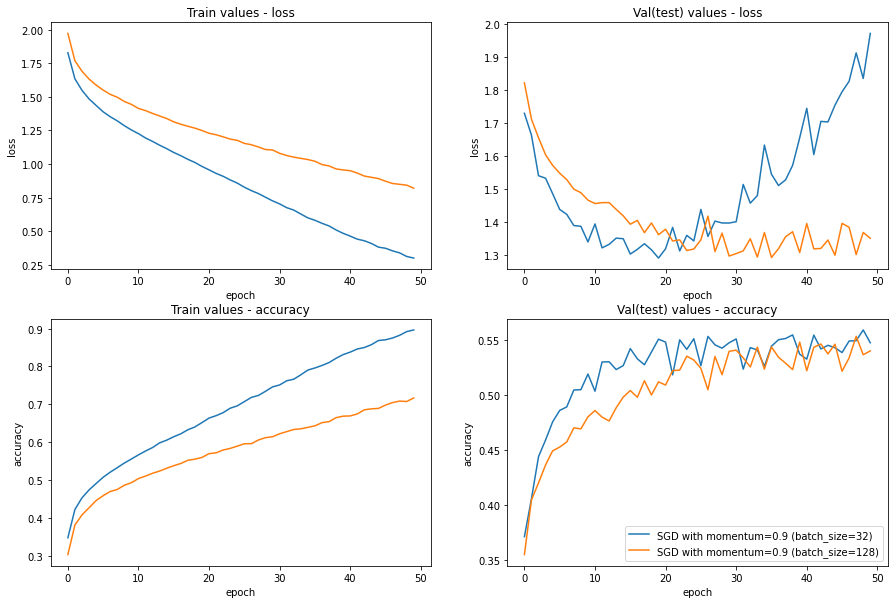

In [23]:
plot_training_history(train_histories= {
    'SGD with momentum=0.9 (batch_size=32)': hist_SGD_momentum_batch32.history,
    'SGD with momentum=0.9 (batch_size=128)': hist_SGD_momentum_batch128.history
})

1. Модель із *розміром партії 32* показала **кращу точність** на тестовій вибірці
2. **Перенавчання**: на тренувальній вибірці покращуються показники функції втрат та точності, в то й час як на тестовій вибірці є нестабільними (особливо показники функції втрат для моделі із розміром партії 32, які свідчать про перенавчання)
3. **Точність**: зберігається тенденція моделей на покращення здатності узагальнення, причому криві точності на тестовій вибірці є *більш стабільними, ніж аналогічні для оптимізатора SGD без імпульсу*

### Root Mean Square Propagation (RMSprop)

#### RMSprop - batch 32

In [13]:
hist_RMSprop_batch32 = train_model(RMSprop(learning_rate=1e-3, rho=0.9), batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 49s 31ms/step - loss: 1.9292 - accuracy: 0.3070 - val_loss: 1.7711 - val_accuracy: 0.3618
Epoch 2/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.7121 - accuracy: 0.3883 - val_loss: 1.6634 - val_accuracy: 0.4162
Epoch 3/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.6418 - accuracy: 0.4159 - val_loss: 1.7403 - val_accuracy: 0.3783
Epoch 4/50
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6083 - accuracy: 0.4308 - val_loss: 1.8549 - val_accuracy: 0.3833
Epoch 5/50
1563/1563 [==============================] - 59s 37ms/step - loss: 1.5917 - accuracy: 0.4352 - val_loss: 1.6391 - val_accuracy: 0.4151
Epoch 6/50
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5680 - accuracy: 0.4446 - val_loss: 1.5755 - val_accuracy: 0.4383
Epoch 7/50
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5585 - accuracy: 0.4503 - val_loss: 1.5685 -

#### RMSprop - batch 128

In [14]:
hist_RMSprop_batch128 = train_model(RMSprop(learning_rate=1e-3, rho=0.9), batch_size=128)

Epoch 1/50
391/391 [==============================] - 21s 51ms/step - loss: 2.0858 - accuracy: 0.2604 - val_loss: 1.8455 - val_accuracy: 0.3243
Epoch 2/50
391/391 [==============================] - 19s 49ms/step - loss: 1.7886 - accuracy: 0.3572 - val_loss: 2.0635 - val_accuracy: 0.2898
Epoch 3/50
391/391 [==============================] - 20s 52ms/step - loss: 1.6859 - accuracy: 0.3978 - val_loss: 1.6532 - val_accuracy: 0.4115
Epoch 4/50
391/391 [==============================] - 20s 51ms/step - loss: 1.6131 - accuracy: 0.4217 - val_loss: 1.6124 - val_accuracy: 0.4175
Epoch 5/50
391/391 [==============================] - 20s 52ms/step - loss: 1.5592 - accuracy: 0.4419 - val_loss: 1.5436 - val_accuracy: 0.4510
Epoch 6/50
391/391 [==============================] - 19s 48ms/step - loss: 1.5147 - accuracy: 0.4568 - val_loss: 1.5295 - val_accuracy: 0.4594
Epoch 7/50
391/391 [==============================] - 20s 50ms/step - loss: 1.4726 - accuracy: 0.4736 - val_loss: 1.4865 - val_accuracy:

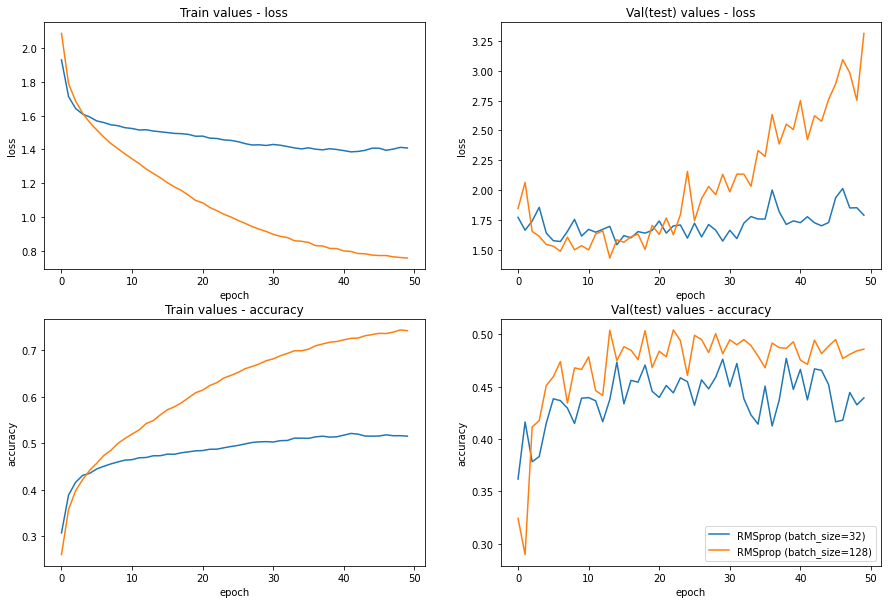

In [24]:
plot_training_history(train_histories= {
    'RMSprop (batch_size=32)': hist_RMSprop_batch32.history,
    'RMSprop (batch_size=128)': hist_RMSprop_batch128.history
})

1. Модель із *розміром партії 128* показала **кращу точність** на тестовій вибірці; варто відзначити вагому різницю між результатами для різних розмірів партії
2. **Перенавчання та недонавчання**: на тренувальній вибірці покращуються показники функції втрат та точності для моделі із розміром партії 128, в то й час як на тестовій вибірці є нестабільними; гладкий вигляд функції втрат та несуттєві зміни у значеннях у порівнянні з початком навчання для моделі із розміром партії 32, ймовірно, свідчать про недостатню складність моделі (*underfitting*) 
3. **Точність**: тенденція моделей на покращення здатності узагальнення помітна лише на початку навчання, подальший процес *показує на тестовій вибірці стабільно нестабільні результати* :) 

### Adaptive Moment Estimation (Adam)

#### Adam - batch 32

In [16]:
hist_Adam_batch32 = train_model(Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999), batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8264 - accuracy: 0.3378 - val_loss: 1.6824 - val_accuracy: 0.3917
Epoch 2/50
1563/1563 [==============================] - 71s 46ms/step - loss: 1.6272 - accuracy: 0.4184 - val_loss: 1.5617 - val_accuracy: 0.4458
Epoch 3/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5326 - accuracy: 0.4528 - val_loss: 1.4807 - val_accuracy: 0.4750
Epoch 4/50
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4700 - accuracy: 0.4757 - val_loss: 1.4806 - val_accuracy: 0.4715
Epoch 5/50
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4162 - accuracy: 0.4935 - val_loss: 1.4456 - val_accuracy: 0.4865
Epoch 6/50
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3682 - accuracy: 0.5116 - val_loss: 1.4969 - val_accuracy: 0.4771
Epoch 7/50
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3234 - accuracy: 0.5288 - val_loss: 1.3908 -

#### Adam - batch 128

In [17]:
hist_Adam_batch128 = train_model(Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999), batch_size=128)

Epoch 1/50
391/391 [==============================] - 24s 58ms/step - loss: 1.8475 - accuracy: 0.3328 - val_loss: 1.6628 - val_accuracy: 0.3995
Epoch 2/50
391/391 [==============================] - 21s 54ms/step - loss: 1.6430 - accuracy: 0.4107 - val_loss: 1.6225 - val_accuracy: 0.4133
Epoch 3/50
391/391 [==============================] - 24s 60ms/step - loss: 1.5553 - accuracy: 0.4452 - val_loss: 1.5279 - val_accuracy: 0.4622
Epoch 4/50
391/391 [==============================] - 24s 61ms/step - loss: 1.4887 - accuracy: 0.4692 - val_loss: 1.4770 - val_accuracy: 0.4785
Epoch 5/50
391/391 [==============================] - 22s 57ms/step - loss: 1.4411 - accuracy: 0.4868 - val_loss: 1.4432 - val_accuracy: 0.4822
Epoch 6/50
391/391 [==============================] - 23s 60ms/step - loss: 1.3932 - accuracy: 0.5044 - val_loss: 1.4295 - val_accuracy: 0.4915
Epoch 7/50
391/391 [==============================] - 20s 51ms/step - loss: 1.3497 - accuracy: 0.5182 - val_loss: 1.4538 - val_accuracy:

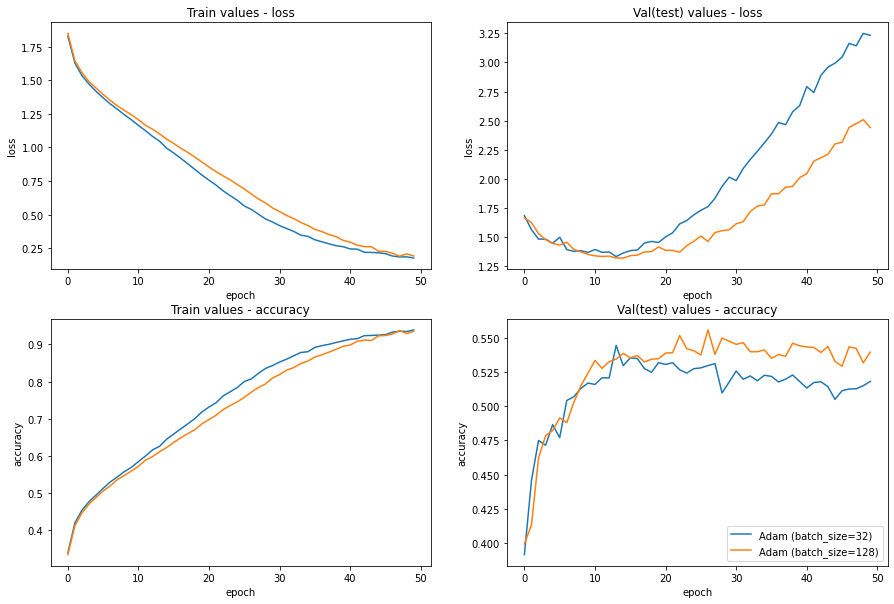

In [25]:
plot_training_history(train_histories= {
    'Adam (batch_size=32)': hist_Adam_batch32.history,
    'Adam (batch_size=128)': hist_Adam_batch128.history
})

1. Модель із *розміром партії 128* показала **кращу точність** на тестовій вибірці; варто зауважити, що на тренувальній вибірці обидві моделі показують дуже схожі результати
2. **Перенавчання**: на тренувальній вибірці покращуються показники функції втрат та точності; обидві моделі мають негативну тенденцію на зростання значень функції втрат на тестовій вибірці, що свідчить про перенавчання
3. **Точність**: зберігається тенденція моделей на покращення здатності узагальнення для моделі із розміром партії 128; в той же час, для моделі із розміром партії 32 показник точності покращується приблизно до 20 епохи, після чого йде тренд на спадання

### Lion

#### Lion - batch 32

In [19]:
hist_Lion_batch32 = train_model(Lion(learning_rate=3e-4), batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 69s 43ms/step - loss: 1.7724 - accuracy: 0.3595 - val_loss: 1.6399 - val_accuracy: 0.4179
Epoch 2/50
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6063 - accuracy: 0.4242 - val_loss: 1.5966 - val_accuracy: 0.4338
Epoch 3/50
1563/1563 [==============================] - 66s 42ms/step - loss: 1.7899 - accuracy: 0.4371 - val_loss: 1.7112 - val_accuracy: 0.3876
Epoch 4/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6709 - accuracy: 0.3966 - val_loss: 1.6305 - val_accuracy: 0.4108
Epoch 5/50
1563/1563 [==============================] - 65s 41ms/step - loss: 1.6702 - accuracy: 0.4125 - val_loss: 1.6920 - val_accuracy: 0.3935
Epoch 6/50
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6151 - accuracy: 0.4210 - val_loss: 1.5705 - val_accuracy: 0.4390
Epoch 7/50
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6110 - accuracy: 0.4251 - val_loss: 1.5771 -

#### Lion - batch 128

In [20]:
hist_Lion_batch128 = train_model(Lion(learning_rate=3e-4), batch_size=128)

Epoch 1/50
391/391 [==============================] - 33s 80ms/step - loss: 1.7988 - accuracy: 0.3518 - val_loss: 1.6029 - val_accuracy: 0.4350
Epoch 2/50
391/391 [==============================] - 30s 76ms/step - loss: 1.5524 - accuracy: 0.4474 - val_loss: 1.5081 - val_accuracy: 0.4619
Epoch 3/50
391/391 [==============================] - 33s 86ms/step - loss: 1.4701 - accuracy: 0.4736 - val_loss: 1.4789 - val_accuracy: 0.4737
Epoch 4/50
391/391 [==============================] - 82s 210ms/step - loss: 1.4146 - accuracy: 0.4965 - val_loss: 1.4337 - val_accuracy: 0.4913
Epoch 5/50
391/391 [==============================] - 106s 270ms/step - loss: 1.3638 - accuracy: 0.5160 - val_loss: 1.4174 - val_accuracy: 0.5034
Epoch 6/50
391/391 [==============================] - 89s 228ms/step - loss: 1.3265 - accuracy: 0.5284 - val_loss: 1.4159 - val_accuracy: 0.4993
Epoch 7/50
391/391 [==============================] - 88s 225ms/step - loss: 1.2846 - accuracy: 0.5409 - val_loss: 1.4180 - val_accu

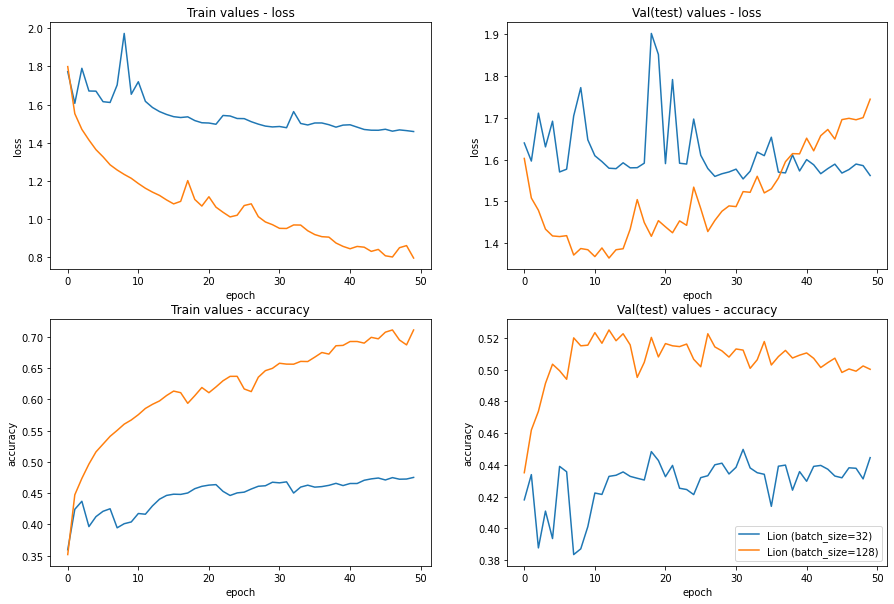

In [26]:
plot_training_history(train_histories= {
    'Lion (batch_size=32)': hist_Lion_batch32.history,
    'Lion (batch_size=128)': hist_Lion_batch128.history
})

1. Модель із *розміром партії 128* показала **суттєво кращу точність** на тестовій вибірці; в цілому спостерігається сильна розбіжність між результатами для різних розмірів партії
2. **Перенавчання та недонавчання**: значення функції втрат мало змінюються як на тренувальній, так і на тестовій вибірці для розміру партії 32, що може вказувати на недостатню складність моделі (*underfitting*); для розміру партії 128 спостерігаються обернені тендеції для значень функції втрат (на тренувальній зменшуються, на тестовій зростають), що свідчить про перенавчання
3. **Точність**: для моделі із розміром партії 128 зберігається тенденція на збільшення значення точності, в той час як графік для розміру партії 32 є нестабільним, і показаний остаточний результат є достатньо низьким

#### Висновок

1. Для більшості оптимізаторів кращі значення точності показала модель із розміром партії 128
2. Практично у всіх випадках можна побачити ознаки перенавчання; у двох випадках із оптимізаторами RMSprop та Lion також помітні ознаки недонавчання
3. Найбільш стабільні та високі значення точності показали моделі із оптимізаторами Adam та стохастичний градієнтний спуск із імпульсом